In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
import math
from sklearn.preprocessing import MinMaxScaler
import textwrap
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import numpy as np

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe
from statistics import mean, median
from adjustText import adjust_text

from sklearn.cluster import KMeans
import matplotlib.transforms
import matplotlib.path
from matplotlib.collections import LineCollection


In [64]:
os.chdir('./data')
df_raw = pd.read_csv('Stats.csv')
image1 = Image(filename='img1.png', width=800, height=400)
os.chdir('../')

In [65]:
df_raw
df_raw = df_raw[df_raw['Minutes Played'] >= 9*90]
df_raw = df_raw[df_raw['Season'] == '2020-2021']
df_raw = df_raw[df_raw['Competition'] == 'Premier League']
df_raw = df_raw[(df_raw['Position'] == 'MFFW') | (df_raw['Position'] == 'FWMF')| (df_raw['Position'] == 'FW')]

In [66]:
df_raw.columns.to_list()

['Unnamed: 0',
 'Player',
 'Nationality',
 'Position',
 'Team',
 'Competition',
 'Age',
 'Minutes Played',
 'Goals',
 'Assists',
 'Non-Penalty Goals',
 'Penalties Scored',
 'Penalties Attempted',
 'Yellow Cards',
 'Red Cards',
 'Goal Contributions per 90',
 'Non-Penalty Goals per 90',
 'Non-Penalty Goal Contributions per 90',
 'xG',
 'Non-Penalty xG',
 'xA',
 'Non-Penalty xGC',
 'xGC per 90',
 'GK Goals Conceded per 90',
 'GK Shots on Target Against',
 'GK Saves',
 'GK Save %',
 'GK Wins',
 'GK Draws',
 'GK Losses',
 'GK Clean Sheets',
 'GK Clean Sheet %',
 'GK Penalties Faced',
 'GK Penalties Conceded',
 'GK Penalties Saved',
 'GK Penalties Off Target',
 'GK Penalty Save %',
 'GK Free Kicks Conceded',
 'GK Corner Kicks Conceded',
 'GK Own Goals Conceded',
 'GK Post-Shot xG Against',
 'GK Post-Shot xG Against per Shot on Target',
 'GK Post-Shot xG Against PlusMinus per 90',
 'GK Long Passes Completed',
 'GK Long Passes Attempted',
 'GK Long Pass Completion %',
 'GK Passes Attempted',
 

In [67]:
df = pd.DataFrame(df_raw['Player_ID_Full'])

A_title = 'Progressive Passes + Carries'
B_title = 'Non-Penalty Goal Contributions per 90'
C_title = 'Tackles + Interceptions'

df['B'] = df_raw[B_title]
df['A'] = df_raw['Progressive Passes'] + df_raw['Progressive Carries'] #df_raw[A_title] 
df['C'] = df_raw[C_title]

df.set_index('Player_ID_Full', inplace=True)


In [68]:
df_raw

,Unnamed: 0,Player,Nationality,Position,Team,Competition,Age,Minutes Played,Goals,Assists,...,Tackles Attempted,Tackle Success %,Turnovers,Shots per Touch,Share of Touches in the Final Third %,Deep Progressions,Long Pass Preference %,Season,Player_ID,Player_ID_Full
6046,8089,Tammy Abraham,ENG,FW,Chelsea,Premier League,22,1040,0.52,0.09,...,1.12,61.607143,4.48,0.089902,44.479005,1.691291,7.583774,2020-2021,Tammy Abraham_Chelsea_2020-2021,Tammy Abraham_ENG_FW_Chelsea_Premier League_22...
6050,8095,Che Adams,SCO,FW,Southampton,Premier League,24,2667,0.30,0.17,...,1.58,63.924051,4.91,0.057273,47.550845,2.219427,13.075701,2020-2021,Che Adams_Southampton_2020-2021,Che Adams_SCO_FW_Southampton_Premier League_24...
6095,8154,Miguel Almirón,PAR,MFFW,Newcastle Utd,Premier League,26,2429,0.15,0.04,...,3.26,54.601227,4.15,0.027982,38.016529,4.685620,13.315755,2020-2021,Miguel Almirón_Newcastle Utd_2020-2021,Miguel Almirón_PAR_MFFW_Newcastle Utd_Premier ...
6118,8190,Michail Antonio,JAM,FW,West Ham,Premier League,30,1974,0.46,0.23,...,0.96,66.666667,7.67,0.078495,54.832248,3.688893,11.680631,2020-2021,Michail Antonio_West Ham_2020-2021,Michail Antonio_JAM_FW_West Ham_Premier League...
6140,8222,Pierre-Emerick Aubameyang,GAB,FW,Arsenal,Premier League,31,2332,0.39,0.12,...,1.28,51.562500,2.59,0.061891,48.977395,2.265296,7.924377,2020-2021,Pierre-Emerick Aubameyang_Arsenal_2020-2021,Pierre-Emerick Aubameyang_GAB_FW_Arsenal_Premi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,10830,Willian,BRA,FWMF,Arsenal,Premier League,31,1406,0.06,0.32,...,2.18,47.247706,2.95,0.021477,52.070263,5.270941,19.603078,2020-2021,Willian_Arsenal_2020-2021,Willian_BRA_FWMF_Arsenal_Premier League_31_202...
8037,10833,Callum Wilson,ENG,FW,Newcastle Utd,Premier League,28,2084,0.52,0.22,...,0.95,58.947368,6.07,0.069343,49.474754,2.208434,4.392387,2020-2021,Callum Wilson_Newcastle Utd_2020-2021,Callum Wilson_ENG_FW_Newcastle Utd_Premier Lea...
8045,10843,Chris Wood,NZL,FW,Burnley,Premier League,28,2741,0.39,0.10,...,0.92,60.869565,4.85,0.069401,52.743902,1.506799,3.869969,2020-2021,Chris Wood_Burnley_2020-2021,Chris Wood_NZL_FW_Burnley_Premier League_28_20...
8061,10866,Wilfried Zaha,CIV,FW,Crystal Palace,Premier League,27,2612,0.38,0.07,...,1.89,61.904762,8.80,0.047100,51.953537,3.884657,9.674797,2020-2021,Wilfried Zaha_Crystal Palace_2020-2021,Wilfried Zaha_CIV_FW_Crystal Palace_Premier Le...


In [69]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.index = df.index
df_scaled.reset_index(inplace= True)
df_scaled['Pos'] = df_scaled['Player_ID_Full'].str.split('_', expand = True)[2]
df_scaled['Player'] = df_scaled['Player_ID_Full'].str.split('_', expand = True)[0]
df = df_scaled

In [70]:
# Conversion to Barycentric Coordinates and Quadratic Normalization
df['Total Rank'] = (df['A'] + df['B'] + df['C'])
df['A_bary'] = (df['A']**2) / (df['A']**2 + df['B']**2 + df['C']**2)
df['B_bary'] = (df['B']**2) / (df['A']**2 + df['B']**2 + df['C']**2)
df['C_bary'] = (df['C']**2) / (df['A']**2 + df['B']**2 + df['C']**2)
#df['Sum'] = df['A_bary'] + df['B_bary'] + df['C_bary']

df['A'] = df['A_bary']
df['B'] = df['B_bary']
df['C'] = df['C_bary']

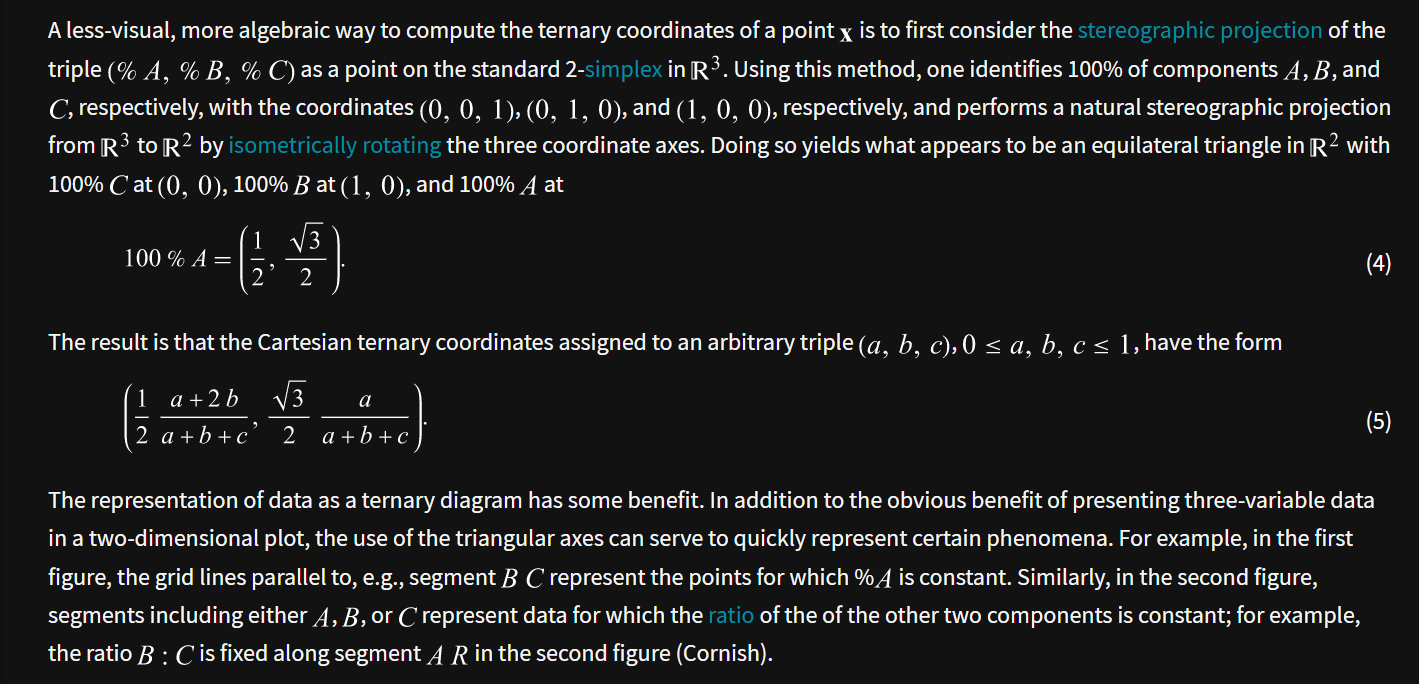

In [71]:
image1

In [72]:
# https://mathworld.wolfram.com/TernaryDiagram.html
df['XT'] = (0.5* ((df['A'] + 2 * df['B']) / (df['A'] + df['B'] + df['C'])))
df['YT'] = ((math.sqrt(3)/2) * ((df['A']) / (df['A'] + df['B'] + df['C'])))

df = df.sort_values(by=['Total Rank'], ascending = False)
df = df.head(100)

In [73]:
palette = sns.color_palette("plasma", 7).as_hex()
print(palette)

['#4c02a1', '#7e03a8', '#aa2395', '#cc4778', '#e66c5c', '#f89540', '#fdc527']


In [74]:
manual_centroids = [[0.5, (math.sqrt(3)/2)], [0, 0], [1, 0], [0.5, (math.sqrt(3)/6)], [0.75, (math.sqrt(3)/4)], [0.25, (math.sqrt(3)/4)], [0.5, 0]]

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(manual_centroids)
df['cluster'] = kmeans.predict(df[['XT', 'YT']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2], 3: cen_x[3], 4: cen_x[4], 5: cen_x[5], 6: cen_x[6]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2], 3: cen_y[3], 4: cen_y[4], 5: cen_y[5], 6: cen_y[6]})

# define and map colors
df['color'] = df.cluster.map({0: palette[0], 1: palette[1], 2: palette[2], 3: palette[3], 4: palette[4], 5: palette[5], 6: palette[6]})


/Users/msuatgunerli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but KMeans was fitted without feature names



In [75]:
# kmeans = KMeans(n_clusters=7, random_state=0)
# df['cluster'] = kmeans.fit_predict(df[['XT', 'YT']])

# # get centroids
# centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids]
# cen_y = [i[1] for i in centroids]

# ## add to df
# df['cen_x'] = df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2], 3: cen_x[3], 4: cen_x[4], 5: cen_x[5], 6: cen_x[6]})
# df['cen_y'] = df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2], 3: cen_y[3], 4: cen_y[4], 5: cen_y[5], 6: cen_y[6]})

# # define and map colors
# df['color'] = df.cluster.map({0: palette[0], 1: palette[1], 2: palette[2], 3: palette[3], 4: palette[4], 5: palette[5], 6: palette[6]})


In [76]:
df.head(20)

,Player_ID_Full,B,A,C,Pos,Player,Total Rank,A_bary,B_bary,C_bary,XT,YT,cluster,cen_x,cen_y,color
6,Gareth Bale_WAL_FW_Tottenham_Premier League_31...,0.726795,0.127824,0.145381,FW,Gareth Bale,1.866621,0.127824,0.726795,0.145381,0.790707,0.110699,4,1.00,0.000000,#e66c5c
28,Jack Grealish_ENG_FWMF_Aston Villa_Premier Lea...,0.197718,0.732094,0.070188,FWMF,Jack Grealish,1.829318,0.732094,0.197718,0.070188,0.563765,0.634012,3,0.50,0.866025,#cc4778
57,Mason Mount_ENG_MFFW_Chelsea_Premier League_21...,0.056741,0.443013,0.500246,MFFW,Mason Mount,1.650916,0.443013,0.056741,0.500246,0.278248,0.383660,1,0.25,0.433013,#7e03a8
82,Andros Townsend_ENG_MFFW_Crystal Palace_Premie...,0.030283,0.121750,0.847968,MFFW,Andros Townsend,1.567894,0.121750,0.030283,0.847968,0.091158,0.105438,5,0.00,0.000000,#f89540
23,Phil Foden_ENG_FWMF_Manchester City_Premier Le...,0.464906,0.322687,0.212406,FWMF,Phil Foden,1.540992,0.322687,0.464906,0.212406,0.626250,0.279455,6,0.50,0.288675,#fdc527
77,Bernardo Silva_POR_MFFW_Manchester City_Premie...,0.089094,0.661598,0.249308,MFFW,Bernardo Silva,1.487597,0.661598,0.089094,0.249308,0.419893,0.572961,1,0.25,0.433013,#7e03a8
58,Lucas Moura_BRA_FWMF_Tottenham_Premier League_...,0.156115,0.198952,0.644933,FWMF,Lucas Moura,1.474514,0.198952,0.156115,0.644933,0.255591,0.172297,1,0.25,0.433013,#7e03a8
10,Saïd Benrahma_ALG_FWMF_West Ham_Premier League...,0.171510,0.364865,0.463625,FWMF,Saïd Benrahma,1.453709,0.364865,0.171510,0.463625,0.353943,0.315983,6,0.50,0.288675,#fdc527
40,Diogo Jota_POR_FW_Liverpool_Premier League_23_...,0.476224,0.359930,0.163846,FW,Diogo Jota,1.411674,0.359930,0.476224,0.163846,0.656189,0.311709,0,0.75,0.433013,#4c02a1
65,Paul Pogba_FRA_MFFW_Manchester Utd_Premier Lea...,0.064153,0.451958,0.483889,MFFW,Paul Pogba,1.411162,0.451958,0.064153,0.483889,0.290132,0.391407,1,0.25,0.433013,#7e03a8


In [77]:
markersizedef = 250*df['Total Rank']**np.sqrt(2/3)
print(max(markersizedef), min(markersizedef), mean(markersizedef))
max(markersizedef) / mean(markersizedef)

416.1562411694292 57.747507296851836 240.1145077585645


1.733157421657649

In [78]:
smallfont = 18
midfont = 22
largefont = 28

fig = go.Figure()
fig.layout.template = 'plotly_dark'
fig.update_layout(height=(math.sqrt(3)/2) * 1500, width=1500, showlegend=False)
fig.add_trace(go.Scatter(x=[0, 0.5, 1, 0], y=[0, math.sqrt(3)/2, 0, 0], mode="lines",
                         name="Outer Triangle", opacity=1, line_color='white', line_width=5))  # line=dict(color="#7F7F7F")
#fig.add_trace(go.Scatter(x=[0.5, 1, 0], y=[math.sqrt(3)/2, 0, 0], mode="markers+text",name="Axes Markers", text=["Pure A", "Pure B", "Pure C"], textposition="top center", textfont_size = 25))
fig.add_trace(go.Scatter(x=[0.5], y=[math.sqrt(3)/2 + 0.02], mode="text", name="Axes Markers",
                         text=['<br>'.join(textwrap.wrap(A_title, 15))], textposition="top center", textfont_size=smallfont))
fig.add_trace(go.Scatter(x=[1.02], y=[-0.02], mode="text", name="Axes Markers",
                         text=['<br>'.join(textwrap.wrap(B_title, 15))], textposition="bottom right", textfont_size=smallfont))
fig.add_trace(go.Scatter(x=[-0.02], y=[-0.02], mode="text", name="Axes Markers",
                         text=['<br>'.join(textwrap.wrap(C_title, 15))], textposition="bottom left", textfont_size=smallfont))
fig.add_trace(go.Scatter(x=[0.25 - 0.10], y=[math.sqrt(3)/4], mode="text",
                         name="Axes Markers", text=["A + C"], textposition="middle center", textfont_size=smallfont))
fig.add_trace(go.Scatter(x=[0.75 + 0.10], y=[math.sqrt(3)/4], mode="text",
                         name="Axes Markers", text=["A + B"], textposition="middle center", textfont_size=smallfont))
fig.add_trace(go.Scatter(x=[0.5], y=[0 - 0.025], mode="text", name="Axes Markers",
                         text=["C + B"], textposition="bottom center", textfont_size=smallfont))
fig.update_xaxes(range=[-0.25, 1.25], showgrid=False, zeroline=False,
                 visible=False, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(range=[-0.25, 1.25*math.sqrt(3)/2], showgrid=False,
                 zeroline=False, visible=False, gridwidth=1, gridcolor='LightPink')

arrow1 = go.layout.Annotation(dict(x=0.5, y=math.sqrt(3)/2, xref="x", yref="y", text="", showarrow=True,
                                   axref="x", ayref='y', ax=0.5, ay=0, arrowhead=2, arrowwidth=5, opacity=0.25, arrowcolor='white'))
arrow2 = go.layout.Annotation(dict(x=1, y=0, xref="x", yref="y", text="", showarrow=True, axref="x",
                                   ayref='y', ax=0.25, ay=math.sqrt(3)/4, arrowhead=2, arrowwidth=5, opacity=0.25, arrowcolor='white'))
arrow3 = go.layout.Annotation(dict(x=0, y=0, xref="x", yref="y", text="", showarrow=True, axref="x",
                                   ayref='y', ax=0.75, ay=math.sqrt(3)/4, arrowhead=2, arrowwidth=5, opacity=0.25, arrowcolor='white'))
fig.update_layout(annotations=[arrow1, arrow2, arrow3])

fig.add_traces(list(px.scatter(df, x='XT', y='YT', color='color', opacity=1, hover_data=['Player', 'Total Rank', 'A', 'B', 'C'], size=markersizedef, template='plotly_dark').select_traces()))

# fig.add_traces(list(px.scatter(df[df['Total Rank'] >= 1.5], x='XT', y='YT', color_discrete_sequence=['green'], opacity=1, hover_data=[
#                'Player', 'Total Rank', 'A', 'B', 'C'], size='Total Rank', template='plotly_dark').select_traces()))
# print(len(df))
fig.show()


In [79]:
# https://tousu.in/qa/?qa=830541/

def rainbowarrow(ax, start, end, cmap="Greys", n=50,lw=3):
    cmap = plt.get_cmap(cmap,n)
    # Arrow shaft: LineCollection
    x = np.linspace(start[0],end[0],n)
    y = np.linspace(start[1],end[1],n)
    points = np.array([x,y]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1],points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, linewidth=lw)
    lc.set_array(np.linspace(0,1,n))
    ax.add_collection(lc)
    # Arrow head: Triangle
    tricoords = [(0,-0.4),(0.5,0),(0,0.4),(0,-0.4)]
    angle = np.arctan2(end[1]-start[1],end[0]-start[0])
    rot = matplotlib.transforms.Affine2D().rotate(angle)
    tricoords2 = rot.transform(tricoords)
    tri = matplotlib.path.Path(tricoords2, closed=True)
    ax.scatter(end[0],end[1], c=1, s=(2*lw)**2, marker=tri, cmap=cmap,vmin=0, zorder = 2)
    ax.autoscale_view()

In [93]:
# fix for overlapping gradient arrows
scaling_factor = 0.005
UnitV1 = tuple(scaling_factor*((np.array([0.5, math.sqrt(3)/2]) - np.array([0.5, 0])) / (math.dist((0.5, 0), (0.5, math.sqrt(3)/2)))))
UnitV2 = tuple(scaling_factor*((np.array([0,0]) - np.array([0.75, math.sqrt(3)/4])) / (math.dist((0.75, math.sqrt(3)/4), (0,0)))))
UnitV3 = tuple(scaling_factor*((np.array([1,0]) - np.array([0.25, math.sqrt(3)/4])) / (math.dist((0.25, math.sqrt(3)/4), (1,0)))))
SP1 = [sum(x) for x in zip(UnitV1,(0.5, 0))]
SP2 = [sum(x) for x in zip(UnitV2,(0.75, math.sqrt(3)/4))]
SP3 = [sum(x) for x in zip(UnitV3,(0.25, math.sqrt(3)/4))]

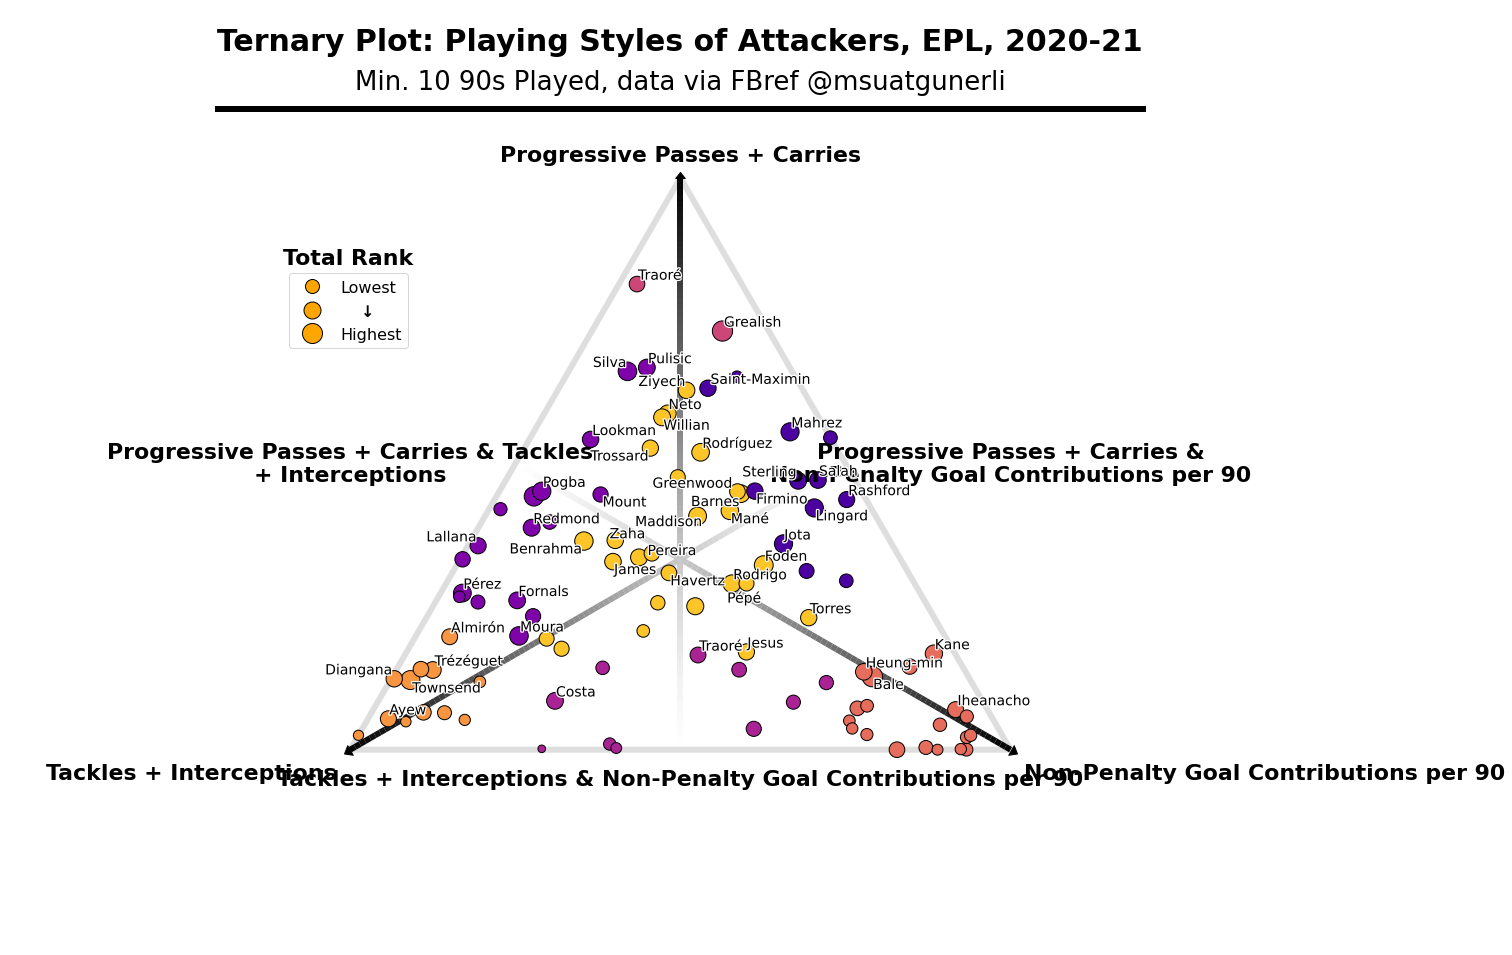

In [95]:
smallfont = 22
midfont = 26
largefont = 30
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20, (math.sqrt(3)/2)*20))
ax.set_facecolor('white')
plt.xlim([-0.3, 1.3])
plt.ylim([-0.3, 1.3*math.sqrt(3)/2])
ax.scatter(x = df['XT'], y = df['YT'], s = markersizedef, color = df['color'],edgecolors='black',zorder=3)
#ax.axline((0, 0), (0.5, math.sqrt(3)/2))
ax.plot([0, 0.5, 1, 0],[0, math.sqrt(3)/2, 0, 0], zorder=2, color = '#7F7F7F', alpha = 0.25,  linewidth = 6)
ax.set_aspect("equal")
rainbowarrow(ax, (SP1), (0.5, math.sqrt(3)/2), cmap="Greys", n=100, lw=6)
rainbowarrow(ax, (SP2), (0,0), cmap="Greys", n=100, lw=6)
rainbowarrow(ax, (SP3), (1,0), cmap="Greys", n=100, lw=6)
# ax.scatter(0.5, 0, zorder = 3, color = "red")
# ax.scatter(0.75, math.sqrt(3)/4, zorder = 3, color = "red")
# ax.scatter(0.25, math.sqrt(3)/4, zorder = 3, color = "red")


Title_A = ax.text(x=0.5, y=math.sqrt(3)/2 + 0.02,s= A_title, va = 'bottom', ha = 'center', fontsize = smallfont, fontweight = 'bold', wrap=True)
Title_A._get_wrap_line_width = lambda: 1000
Title_B = ax.text(x=1.02, y= -0.02, s= B_title,va='top', ha='left', fontsize=smallfont, fontweight = 'bold', wrap=True)
Title_B._get_wrap_line_width = lambda: 500
Title_C = ax.text(x=-0.02, y=-0.02, s=C_title, va='top', ha='right',fontsize=smallfont, fontweight='bold', wrap=True)
Title_C._get_wrap_line_width = lambda: 500

Title_AnC = ax.text(x=0.25 - 0.25, y=math.sqrt(3)/4 ,s= A_title + ' & ' + C_title, va = 'center', ha = 'center', fontsize = smallfont, fontweight = 'bold', wrap=True)
Title_AnC._get_wrap_line_width = lambda: 500
Title_AnB = ax.text(x=0.75 + 0.25, y=math.sqrt(3)/4 ,s=A_title + ' & ' + B_title, va = 'center', ha = 'center', fontsize = smallfont, fontweight = 'bold', wrap=True)
Title_AnB._get_wrap_line_width = lambda: 500
Title_CnB = ax.text(x=0.5, y=-0.03, s=C_title + ' & ' + B_title, va='top', ha='center', fontsize=smallfont, fontweight='bold', wrap=True)
Title_CnB._get_wrap_line_width = lambda: 1000

# path_effects=[pe.Stroke(linewidth=2, foreground='black')]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Lowest', markerfacecolor='orange', markeredgecolor = 'black', markersize=14),
                   Line2D([0], [0], marker='o', color='w', label = '    $\\bf{\u2193}$', markerfacecolor='orange', markeredgecolor= 'black', markersize=17),
                   Line2D([0], [0], marker='o', color='w', label='Highest', markerfacecolor='orange', markeredgecolor= 'black' , markersize=20)]

plt.axis("off")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.plot([-0.2, 1.2],[0.97, 0.97], zorder=2, color = 'black', alpha = 1,  linewidth = 6) # horizontal separator
ax.legend(handles=legend_elements, bbox_to_anchor=(0.25, 0.725), prop={'size': 16}, frameon = True)
ax.text(x= -0.003, y= 0.76 ,s="Total Rank", va = 'top', ha = 'center', fontsize = smallfont, fontweight = 'bold')

#my_suptitle = fig.suptitle('Ternary Plot 1', fontsize = largefont, fontweight = 'bold', y=0.92)
plt.title('Ternary Plot: Playing Styles of Attackers, EPL, 2020-21', fontsize = largefont, fontweight = 'bold', y= 0.98, pad=-25)
ax.text(x=0.5, y= 1.03,s="Min. 10 90s Played, data via FBref @msuatgunerli", va = 'top', ha = 'center', fontsize = midfont)

# for i in range(0, len(df)):
#     ax.annotate(df['Player'].iloc[i].split(' ')[-1], (0.01+df['XT'].iloc[i], 0.01+df['YT'].iloc[i]), fontsize = 12, path_effects=[pe.withStroke(linewidth=2.5, foreground="white")], zorder = 3)

annotationlimiter = 50
texts = [plt.text(df.head(annotationlimiter)['XT'].iloc[i], df.head(annotationlimiter)['YT'].iloc[i], df.head(annotationlimiter)['Player'].iloc[i].split(
    ' ')[-1], fontsize=14, path_effects=[pe.withStroke(linewidth=2.5, foreground="white")], zorder=3, ha='center', va='center') for i in range(len(df.head(annotationlimiter)))]
adjust_text(texts, lim = 500, precision= 0.01)
plt.tight_layout
ax.add_patch(plt.Rectangle((0, 0), 1, 1, facecolor='white',transform=ax.transAxes, zorder=-1))
plt.savefig('temp.png', transparent=False, dpi = 300) #bbox_extra_artists=[my_suptitle]#

In [82]:
df1 = df[df['Player'].str.contains('Vidal')]

In [83]:
df.sort_values(by = 'XT', ascending= False)

,Player_ID_Full,B,A,C,Pos,Player,Total Rank,A_bary,B_bary,C_bary,XT,YT,cluster,cen_x,cen_y,color
16,Dominic Calvert-Lewin_ENG_FW_Everton_Premier L...,0.926919,0.025233,0.047848,FW,Dominic Calvert-Lewin,0.548108,0.025233,0.926919,0.047848,0.939535,0.021852,4,1.0,0.0,#e66c5c
94,Callum Wilson_ENG_FW_Newcastle Utd_Premier Lea...,0.904731,0.058038,0.037231,FW,Callum Wilson,0.642075,0.058038,0.904731,0.037231,0.933750,0.050262,4,1.0,0.0,#e66c5c
87,Jamie Vardy_ENG_FW_Leicester City_Premier Leag...,0.922680,0.021668,0.055652,FW,Jamie Vardy,0.561737,0.021668,0.922680,0.055652,0.933514,0.018765,4,1.0,0.0,#e66c5c
0,Tammy Abraham_ENG_FW_Chelsea_Premier League_22...,0.933116,0.000159,0.066725,FW,Tammy Abraham,0.615023,0.000159,0.933116,0.066725,0.933196,0.000138,4,1.0,0.0,#e66c5c
95,Chris Wood_NZL_FW_Burnley_Premier League_28_20...,0.924147,0.001047,0.074806,FW,Chris Wood,0.446309,0.001047,0.924147,0.074806,0.924670,0.000907,4,1.0,0.0,#e66c5c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Andros Townsend_ENG_MFFW_Crystal Palace_Premie...,0.030283,0.121750,0.847968,MFFW,Andros Townsend,1.567894,0.121750,0.030283,0.847968,0.091158,0.105438,5,0.0,0.0,#f89540
27,Karlan Grant_ENG_FWMF_West Brom_Premier League...,0.059830,0.048954,0.891216,FWMF,Karlan Grant,0.363091,0.048954,0.059830,0.891216,0.084307,0.042396,5,0.0,0.0,#f89540
21,Grady Diangana_ENG_MFFW_West Brom_Premier Leag...,0.004677,0.123972,0.871351,MFFW,Grady Diangana,1.091172,0.123972,0.004677,0.871351,0.066663,0.107363,5,0.0,0.0,#f89540
5,Jordan Ayew_GHA_FWMF_Crystal Palace_Premier Le...,0.030825,0.054023,0.915152,FWMF,Jordan Ayew,1.040424,0.054023,0.030825,0.915152,0.057836,0.046785,5,0.0,0.0,#f89540


In [84]:
df.sort_values(by = 'YT', ascending= False)

,Player_ID_Full,B,A,C,Pos,Player,Total Rank,A_bary,B_bary,C_bary,XT,YT,cluster,cen_x,cen_y,color
83,Adama Traoré_ESP_FW_Wolves_Premier League_24_2...,0.027224,0.814194,0.158582,FW,Adama Traoré,0.979140,0.814194,0.027224,0.158582,0.434321,0.705112,3,0.50,0.866025,#cc4778
28,Jack Grealish_ENG_FWMF_Aston Villa_Premier Lea...,0.197718,0.732094,0.070188,FWMF,Jack Grealish,1.829318,0.732094,0.197718,0.070188,0.563765,0.634012,3,0.50,0.866025,#cc4778
66,Christian Pulisic_USA_FWMF_Chelsea_Premier Lea...,0.115135,0.668183,0.216682,FWMF,Christian Pulisic,1.166991,0.668183,0.115135,0.216682,0.449226,0.578664,1,0.25,0.433013,#7e03a8
77,Bernardo Silva_POR_MFFW_Manchester City_Premie...,0.089094,0.661598,0.249308,MFFW,Bernardo Silva,1.487597,0.661598,0.089094,0.249308,0.419893,0.572961,1,0.25,0.433013,#7e03a8
25,Ryan Fraser_SCO_FWMF_Newcastle Utd_Premier Lea...,0.259759,0.652083,0.088159,FWMF,Ryan Fraser,0.473799,0.652083,0.259759,0.088159,0.585800,0.564720,0,0.75,0.433013,#4c02a1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Willian José_BRA_FW_Wolves_Premier League_28_2...,0.289309,0.001515,0.709176,FW,Willian José,0.166174,0.001515,0.289309,0.709176,0.290067,0.001312,2,0.50,0.000000,#aa2395
95,Chris Wood_NZL_FW_Burnley_Premier League_28_20...,0.924147,0.001047,0.074806,FW,Chris Wood,0.446309,0.001047,0.924147,0.074806,0.924670,0.000907,4,1.00,0.000000,#e66c5c
0,Tammy Abraham_ENG_FW_Chelsea_Premier League_22...,0.933116,0.000159,0.066725,FW,Tammy Abraham,0.615023,0.000159,0.933116,0.066725,0.933196,0.000138,4,1.00,0.000000,#e66c5c
20,Mbaye Diagne_SEN_FW_West Brom_Premier League_2...,0.889414,0.000003,0.110583,FW,Mbaye Diagne,0.405287,0.000003,0.889414,0.110583,0.889416,0.000003,4,1.00,0.000000,#e66c5c
